# Importing the libraries

In [4]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Read the Dataset

In [5]:
import pandas as pd

# Skip the first row & load data properly
df = pd.read_csv("data/sdss_100k_galaxy_form_burst.csv", skiprows=1, low_memory=False)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Show columns
print(df.columns.tolist())

# Display first 5 rows
df.head()


['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err']


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


# Data Preparation

In [6]:
print(df.columns.tolist())
df.head()

['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err']


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [7]:
# Check dataset shape
print("Shape of dataset:", df.shape)

# Check data types and missing values
df.info()

# See basic statistics
df.describe()

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Shape of dataset: (100000, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    1000

In [8]:
df.head()


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [9]:
print(df.columns.tolist())

['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err']


In [10]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Encode the target class (Galaxy Type)
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Display mapping of galaxy types
print("Galaxy class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Galaxy class mapping: {'GALAXY': 0}


In [11]:
# Features and target
X = df.drop('class', axis=1)  # All columns except target
y = df['class']               # Target variable

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80000, 42)
Testing set size: (20000, 42)


In [13]:
# Features: drop columns not useful for prediction
X = df.drop(['objid', 'specobjid', 'subclass', 'class'], axis=1)

# Target
y = df['class']


# Handling Missing Values

In [14]:
df.replace(-9999.0, np.nan, inplace=True)
df.dropna(inplace=True)


# Changing the datatype of subclass from object to int

In [15]:
print(df.columns)
print(df['subclass'].unique())
print(df['subclass'].value_counts())


Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')
['STARFORMING' 'STARBURST']
subclass
STARFORMING    73518
STARBURST      23960
Name: count, dtype: int64


In [16]:
# Drop rows with missing values
df.dropna(inplace=True)

# Encode subclass as target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['subclass'] = le.fit_transform(df['subclass'])  # 0 = STARBURST, 1 = STARFORMING
print("Subclass encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

# Features (X) and target (y)
X = df.drop(['objid', 'specobjid', 'subclass', 'class'], axis=1)
y = df['subclass']

print("✅ Features shape:", X.shape)
print("✅ Target distribution:\n", y.value_counts())


Subclass encoding: {'STARBURST': 0, 'STARFORMING': 1}
✅ Features shape: (97478, 39)
✅ Target distribution:
 subclass
1    73518
0    23960
Name: count, dtype: int64


# Descriptive statistical

In [17]:
# Summary statistics
print(df.describe())

# Check class distribution
print(df['class'].value_counts())

# Check data types
print(df.dtypes)


              objid     specobjid            ra           dec             u  \
count  9.747800e+04  9.747800e+04  97478.000000  97478.000000  97478.000000   
mean   1.237659e+18  2.205947e+18    180.871384     23.408281     19.535651   
std    6.049277e+12  2.427249e+18     75.521237     21.139379      1.414031   
min    1.237646e+18  2.994897e+17      0.008745    -11.244273     12.753830   
25%    1.237655e+18  8.096168e+17    139.186151      3.096875     18.745285   
50%    1.237659e+18  1.426538e+18    181.727246     20.678307     19.326030   
75%    1.237663e+18  2.283458e+18    223.893171     42.135652     20.002553   
max    1.237681e+18  1.412691e+19    359.997922     68.695258     30.327660   

                  g             r             i             z   modelFlux_u  \
count  97478.000000  97478.000000  97478.000000  97478.000000  97478.000000   
mean      18.286963     17.653960     17.295507     17.076613     31.280862   
std        1.467872      1.455235      1.478748    

# Visual analysis

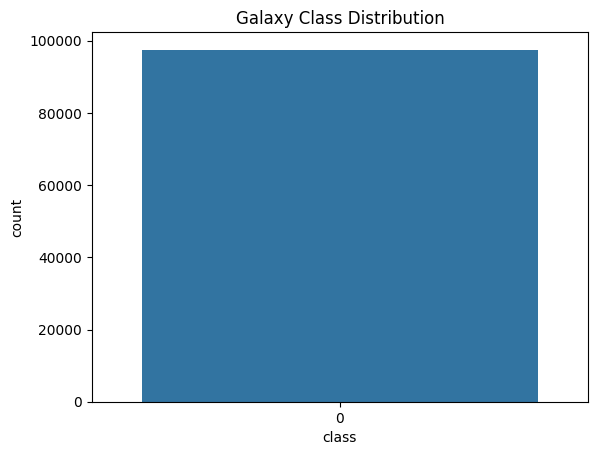

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='class', data=df)
plt.title("Galaxy Class Distribution")
plt.show()


# Correlation heatmap

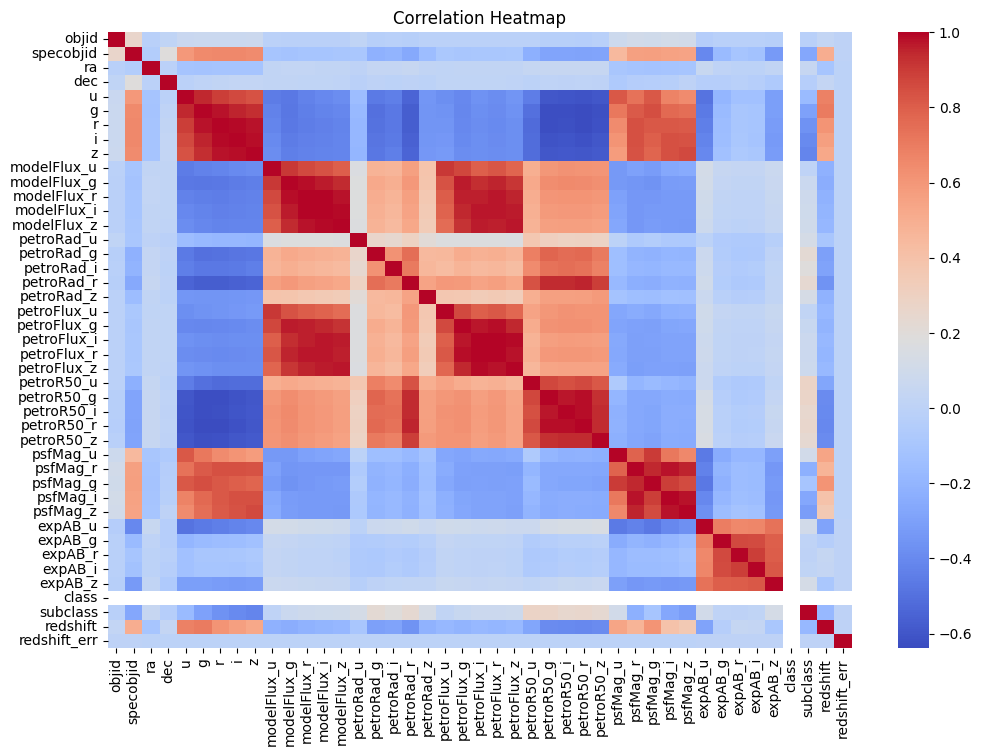

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


# Handle Outliers

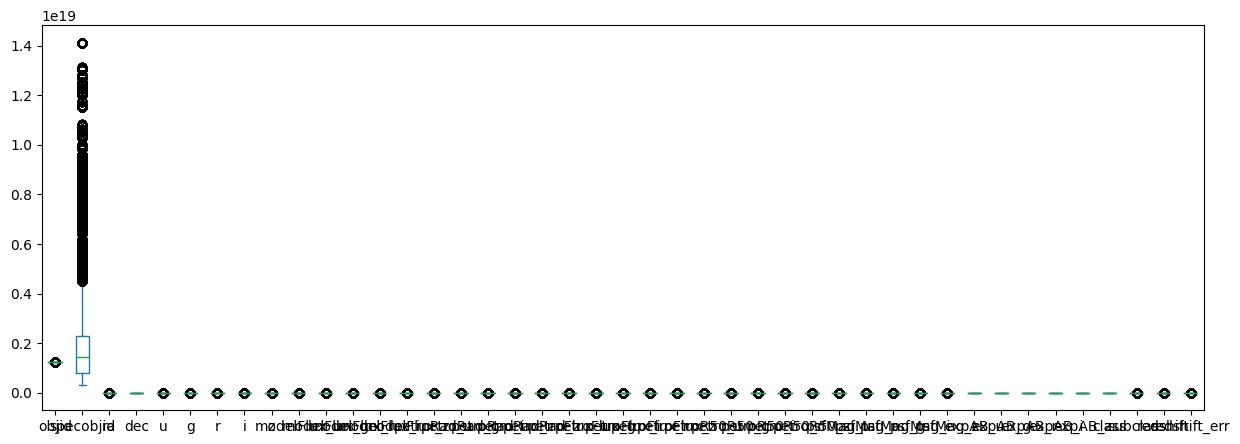

In [20]:
# Plot boxplots for numerical features
df.plot(kind='box', figsize=(15,5))
plt.show()


# Select Best Features Using SelectKBest

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to extract top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)

# Get column names of selected features
feature_names = X.columns[selected_features]
print("Selected features:", feature_names)


Selected feature indices: [ 3  4  5  6 22 23 24 25 30 31]
Selected features: Index(['g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'psfMag_i', 'psfMag_z'],
      dtype='object')


# Balancing Value Counts using Smote

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Resampled dataset shape:", X_resampled.shape)
print("Resampled target distribution:\n", pd.Series(y_resampled).value_counts())


✅ Resampled dataset shape: (147036, 39)
Resampled target distribution:
 subclass
1    73518
0    73518
Name: count, dtype: int64


# Scale Features

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

print("✅ Features scaled successfully.")


✅ Features scaled successfully.


In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
import pandas as pd
print("✅ Resampled dataset shape:", X_resampled.shape)
print("✅ Resampled class distribution:\n", pd.Series(y_resampled).value_counts())


✅ Resampled dataset shape: (147036, 39)
✅ Resampled class distribution:
 subclass
1    73518
0    73518
Name: count, dtype: int64


# Splitting data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("✅ Training set shape:", X_train.shape)
print("✅ Test set shape:", X_test.shape)


✅ Training set shape: (117628, 39)
✅ Test set shape: (29408, 39)


# training the model using Random Forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


# Model Deployment 

✅ Accuracy on test set: 91.17 %

📊 Classification Report:
               precision    recall  f1-score   support

   STARBURST       0.89      0.94      0.91     14704
 STARFORMING       0.94      0.88      0.91     14704

    accuracy                           0.91     29408
   macro avg       0.91      0.91      0.91     29408
weighted avg       0.91      0.91      0.91     29408



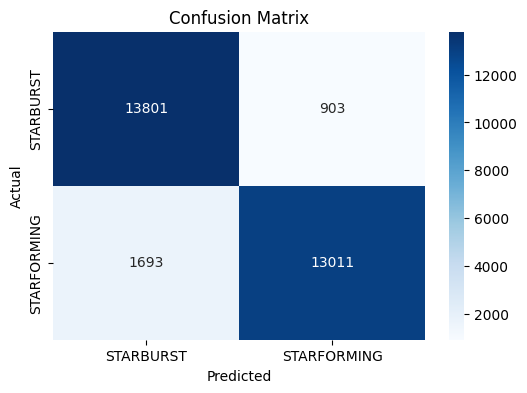

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy on test set:", round(accuracy * 100, 2), "%")

# Print classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['STARBURST', 'STARFORMING']))

# Show confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['STARBURST', 'STARFORMING'], yticklabels=['STARBURST', 'STARFORMING'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# save the model

In [28]:
import joblib

# Save the model to a file
joblib.dump(model, "model.pkl")

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl


# Testing of model

In [34]:
import joblib
import numpy as np

# Load your saved model
model = joblib.load('model.pkl')

# Example: enter **10 feature values**
test_input = [149.3, 1.78, 18.5, 17.2, 16.8, 100, 95, 1.2, 0.85, 0.0001]

# Fill missing features (model expects 39 features)
# We'll use zeros for remaining features for testing
missing_features = [0] * (39 - len(test_input))

# Combine input with missing features
final_input = test_input + missing_features

# Reshape into 2D array for prediction
final_input = np.array(final_input).reshape(1, -1)

# Predict galaxy type
prediction = model.predict(final_input)[0]

# Map prediction to class name
if prediction == 1:
    print("✅ Predicted Galaxy Type: STARFORMING")
else:
    print("✅ Predicted Galaxy Type: STARBURST")

✅ Predicted Galaxy Type: STARFORMING


C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import joblib
import numpy as np

# Load your saved model
model = joblib.load('model.pkl')

# Example: enter **10 feature values**
test_input = [149.3, 1.78, 18.5, 17.2, 16.8, 100, 95, 1.2, 0.85, 0.0001]

# Fill missing features (model expects 39 features)
# We'll use zeros for remaining features for testing
missing_features = [0] * (39 - len(test_input))

# Combine input with missing features
final_input = test_input + missing_features

# Reshape into 2D array for prediction
final_input = np.array(final_input).reshape(1, -1)

# Predict galaxy type
prediction = model.predict(final_input)[0]

# Map prediction to class name
if prediction == 0:
    print("✅ Predicted Galaxy Type: STARFORMING")
else:
    print("✅ Predicted Galaxy Type: STARBURST")

✅ Predicted Galaxy Type: STARBURST


C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
